# My personal analysis for the Chinook Music Store Database

[Dataset](https://www.kaggle.com/datasets/marwandiab/chinookdatabase)

Database Schema
![schema.png](schema.png)

### Questions
- From the top 5 genres, How much did each sell?
- Which country ordered the most Videos?
- How much did each employees sell?
- Which unit price has more sales?

In [28]:
from sqlite3 import connect
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
conn = connect('chinook.db')

In [8]:
def sq(str, con=conn):
    return pd.read_sql('''{}'''.format(str), con)

In [9]:
tables = sq(
    '''SELECT * FROM sqlite_master where type="table";'''
, conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,Album,Album,2,CREATE TABLE [Album]\n(\n [AlbumId] INTEGER...
1,table,Artist,Artist,3,CREATE TABLE [Artist]\n(\n [ArtistId] INTEG...
2,table,Customer,Customer,4,CREATE TABLE [Customer]\n(\n [CustomerId] I...
3,table,Employee,Employee,7,CREATE TABLE [Employee]\n(\n [EmployeeId] I...
4,table,Genre,Genre,9,CREATE TABLE [Genre]\n(\n [GenreId] INTEGER...
5,table,Invoice,Invoice,10,CREATE TABLE [Invoice]\n(\n [InvoiceId] INT...
6,table,InvoiceLine,InvoiceLine,12,CREATE TABLE [InvoiceLine]\n(\n [InvoiceLin...
7,table,MediaType,MediaType,14,CREATE TABLE [MediaType]\n(\n [MediaTypeId]...
8,table,Playlist,Playlist,15,CREATE TABLE [Playlist]\n(\n [PlaylistId] I...
9,table,PlaylistTrack,PlaylistTrack,16,CREATE TABLE [PlaylistTrack]\n(\n [Playlist...


In [10]:
query1 = """SELECT g.name, COUNT(t.trackId) as Sales
FROM genre g
JOIN Track t
ON g.genreId = t.genreId
JOIN InvoiceLine iL
ON iL.trackId = t.trackId
GROUP BY g.name
ORDER BY Sales DESC limit 5;"""

e_q1 = sq(query1, conn)
e_q1

,Name,Sales
0,Rock,835
1,Latin,386
2,Metal,264
3,Alternative & Punk,244
4,Jazz,80


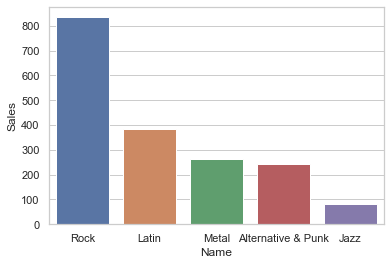

In [18]:
# vis1
sns.set_theme(style='whitegrid')
ax1 = sns.barplot(x='Name', y='Sales', data=e_q1)

## Conclusion 1

Rock has the most sales with over 800 sales where Latin comes second with almost 400 sales.

In [12]:
query2 = """SELECT
  i.BillingCountry AS Country,
  COUNT(t.TrackId) AS Video_Orders
FROM InvoiceLine iL
JOIN Track t
  ON t.TrackId = iL.TrackId
JOIN MediaType m
  ON m.MediaTypeId = t.MediaTypeId
JOIN Invoice i
  ON i.InvoiceId = iL.InvoiceId
WHERE m.MediaTypeId = "3"
GROUP BY Country
ORDER BY Video_Orders DESC;"""

e_q2 = sq(query2, conn)
e_q2

,Country,Video_Orders
0,USA,34
1,Czech Republic,15
2,Chile,9
3,Ireland,8
4,Hungary,8
5,France,7
6,Germany,6
7,Austria,5
8,Finland,4
9,Netherlands,3


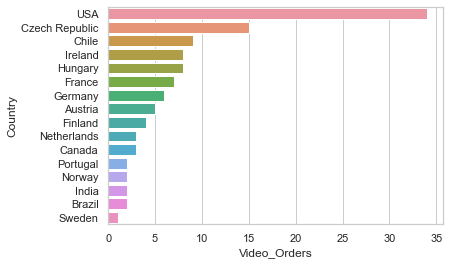

In [22]:
#viz2
ax2 = sns.barplot(x='Video_Orders', y='Country', data=e_q2)

## Conclusion 2

USA is the biggest consumer for Video Type Products

In [14]:
query3 = """SELECT
  e.LastName AS Last_Name,
  e.FirstName AS First_Name,
  ROUND(SUM(i.Total)) AS 'Sales in $'
FROM Employee e
JOIN Customer c
  ON c.SupportRepId = e.EmployeeId
JOIN Invoice i
  ON i.CustomerId = c.CustomerId
GROUP BY e.Lastname,
         e.FirstName
ORDER BY SUM(i.Total) DESC;"""

e_q3 = sq(query3, conn)
e_q3

,Last_Name,First_Name,Sales in $
0,Peacock,Jane,833.0
1,Park,Margaret,775.0
2,Johnson,Steve,720.0


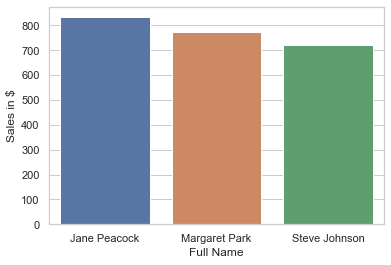

In [27]:
#viz3
e_q3["Full Name"] = e_q3["First_Name"] +" " + e_q3["Last_Name"]
ax3 = sns.barplot(x="Full Name", y="Sales in $", data=e_q3)

## Conclusion 3

There are 3 employees who handle sales in the company and they all come close to the number of sales with each other ranging from 700-830. Jane Peacock has the Most sales out of the 3.

In [16]:
query4 = """SELECT
  iL.UnitPrice AS Price,
  COUNT(*) AS Sales
FROM Invoice i
JOIN InvoiceLine iL
  ON iL.InvoiceId = i.InvoiceId
GROUP BY Price;"""

e_q4 = sq(query4, conn)
e_q4

,Price,Sales
0,0.99,2129
1,1.99,111


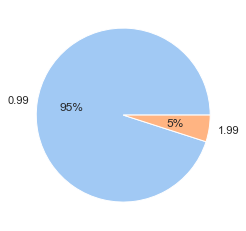

In [40]:
#viz4
ax4_colors = sns.color_palette('pastel')[0:2]
plt.pie(e_q4["Sales"], colors =ax4_colors, labels=e_q4["Price"], autopct='%.0f%%')
plt.show()

## Conclusion 4

Majority of the Sales are from products which costs 0.99$ taking up 95\% of the orders.